In [ ]:
!curl -Lo /hpc/oath399/SPARC_Codeathon_2022/SPARC-Tutorial/mesh_viewer/opencmiss.zinc-3.8.0-cp38-cp38-linux_x86_64.whl https://github.com/OpenCMISS/zinc/releases/download/v3.8.0/opencmiss.zinc-3.8.0-cp38-cp38-linux_x86_64.whl
!pip install /hpc/oath399/SPARC_Codeathon_2022/SPARC-Tutorial/mesh_viewer/opencmiss.zinc-3.8.0-cp38-cp38-linux_x86_64.whl
!pip install scaffoldmaker

In [ ]:
# these are not used unless we decide to go down the cmiss viz route
!pip install mapclient
!pip install opencmiss.argon

In [ ]:
# need to restart jupyter notebook after installing these the first time if code not run outside jupyterlab
!pip install matplotlib
!pip install ipympl

Code above this should be done in setup outside jupyterlab ideally. Code below this should be done as part of the actual tutorial.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from opencmiss.zinc.context import Context
from scaffoldmaker.meshtypes.meshtype_3d_stomach1 import MeshType_3d_stomach1
from opencmiss.zinc.status import OK as ZINC_OK

In [4]:
# generate an opencmiss context into which the mesh is placed
context = Context("Test")
region = context.getDefaultRegion()

# generate a default Rat 1 stomach mesh
options = MeshType_3d_stomach1.getDefaultOptions(parameterSetName='Rat 1')
x = MeshType_3d_stomach1
z = x.generateBaseMesh(region,options)

# get the coordinate field for the mesh
fieldmodule = region.getFieldmodule()
field = fieldmodule.findFieldByName("coordinates")
cache = fieldmodule.createFieldcache()

# get the coordinates of the centre of each element
# TODO: this can be changed to get the edges, and with a mode refined mesh this may look passable

xi = [0.5, 0.5, 0.5] # centre of each element in element coordinates which are from [0,1]
mesh = fieldmodule.findMeshByDimension(3)
el_iter = mesh.createElementiterator()
element = el_iter.next()
all_out = []
while element.isValid():
    cache.setMeshLocation(element, xi)
    result, outValues = field.evaluateReal(cache, 3)
    # Check result for errors, Use outValues
    if result == ZINC_OK:
        all_out.append(outValues)
        #print( element.getIdentifier(), outValues )
    else:
        break
    element = el_iter.next()

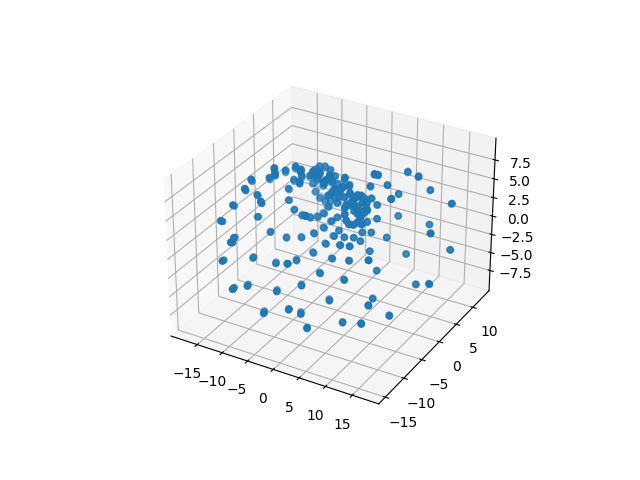

In [18]:
# this enables interactivity in jupyterlab
%matplotlib widget 

# convert to numpy array and plot in matplotlib
all_out_2 = np.array(all_out)
# print(all_out_2[:,2])
all_out_2[np.abs(all_out_2) < 0.0001] = 0.0 # plotting throws an error for numbers that are very close but != 0
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(all_out_2[:,0], all_out_2[:,1], all_out_2[:,2])
